# Regressão Linear Simples Utilizando Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

Com base na distância vamos fazer uma previsão sobre a velocidade<br>
Velocidade e distância até os carros pararem

In [3]:
base = pd.read_csv('cars.csv')

In [4]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [5]:
base = base.drop(['Unnamed: 0'], axis=1)

In [6]:
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [18]:
# Variável independente (Distância)
X = base.iloc[:, 1].values
X

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

In [55]:
# Variável dependente (Velocidade)
y = base.iloc[:, 0].values
y

array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
       13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25],
      dtype=int64)

In [10]:
# Essa correlação só irá funcionar caso eu não tenha executado o reshape, senão ocorrerá erro.
correlacao = np.corrcoef(X, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

***Como é uma relação forte então temos a indicação que podemos utilizar o modelo para fazer a regressão***

>Antes de fazer a previsão é necessário fazer o **reshape** com a variável independente para que fique em um formato de matriz. <br>
Ou seja, em vez de ficar com uma linha para várias colunas<br>
Ficará com uma coluna e várias linhas.

In [53]:
X = X.reshape(-1, 1)

In [38]:
modelo = LinearRegression()

In [39]:
# Utilizamos o fit() para treinar nosso modelo.
modelo.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
# Executamos para saber a interceptação, ou seja, onde ocorrerá a interseção de X e Y
modelo.intercept_

8.283905641787172

In [41]:
# Utilizamos para saber qual a inclinação
modelo.coef_

array([0.16556757])

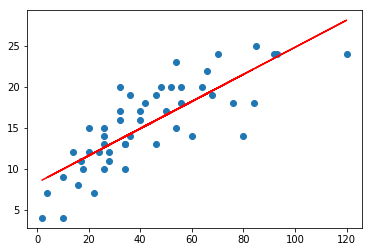

In [42]:
# Plotanto o gráfico
plt.scatter(X, y)
"""
Podemos traçar a linha de regressão, para isso temos que passar:
    - Os dados (Variável independete);
    - Fazer a previsão nos dados utilizando o predict
"""
plt.plot(X, modelo.predict(X), color='red')

Vamos agora fazer a previsão da velocidade no qual a distância de parada foi de 22 pés

1ª forma

In [43]:
# Modo de fazer a previsão manual depois que o modelo já foi treinado
v = modelo.intercept_ + modelo.coef_ * 22
print('Velocidade de', v[0])

Velocidade de 11.926392283962189


2ª Forma

In [47]:
# Temos que colocar duas [[]] para que fique em formato de matriz.
modelo.predict([[22]])

array([11.92639228])

*Em sklearn ao tentar consultar o valor dos residuais ele mostra um valor geral e não o valor de cada ponto.*

In [48]:
# Visualizando os residuais
modelo._residues

478.02124836119646

*Se quisermos saber qual é o residual de cada item devemos utilizar a biblioteca yellowbrick com o método ResidualsPlot*

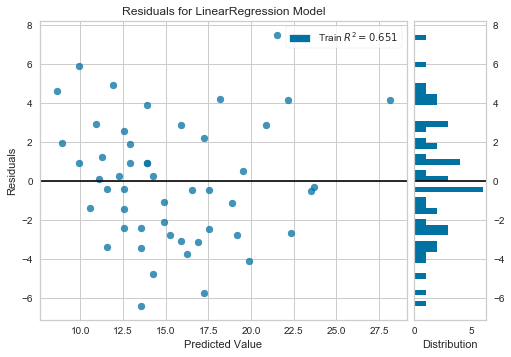

In [52]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()